# Ejercicio 6

Implemente un algoritmo de segmentación binaria que identifique correctamente todos los granos de arroz en la imagen rice.png. 

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Otsu con umbralización global

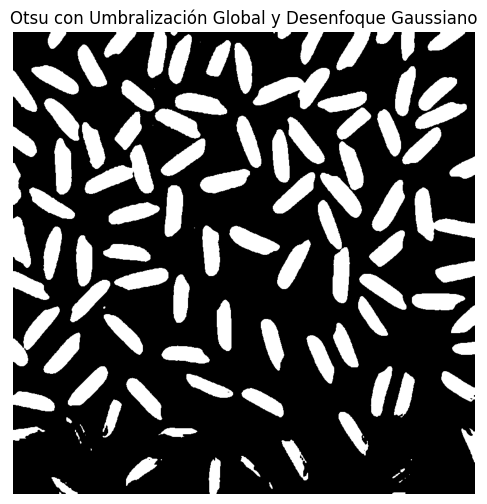

In [5]:

image = cv2.imread("rice.jpg", cv2.IMREAD_GRAYSCALE)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
_, otsu = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.figure(figsize=(6,6))
plt.imshow(otsu, cmap='gray')
plt.title("Otsu con Umbralización Global y Desenfoque Gaussiano")
plt.axis("off")
plt.show()


### Mediana y umbralización de Otsu

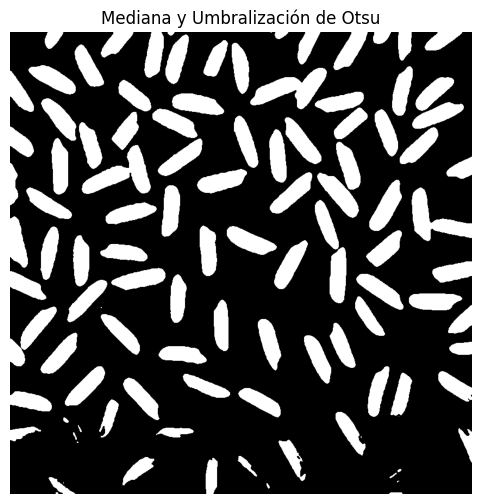

In [46]:
median = cv2.medianBlur(image, 5)
_, medianOtsu = cv2.threshold(median, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.figure(figsize=(6,6))
plt.imshow(medianOtsu, cmap='gray')
plt.title("Mediana y Umbralización de Otsu")
plt.axis("off")
plt.show()

### Otsu y operaciones morfológicas

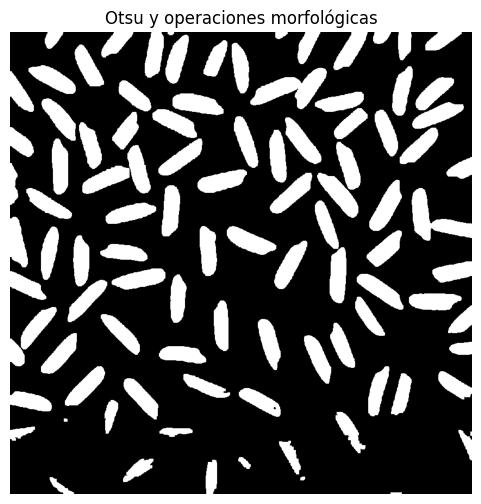

In [47]:
image = cv2.imread("rice.jpg", cv2.IMREAD_GRAYSCALE)
_, binaryImage = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel = np.ones((3, 3), np.uint8)
processed = cv2.morphologyEx(binaryImage, cv2.MORPH_OPEN, kernel, iterations=2)
plt.figure(figsize=(6,6))
plt.imshow(processed, cmap='gray')
plt.title("Otsu y operaciones morfológicas")
plt.axis("off")
plt.show()


### Segmentación global con ecualización, desenfoque y umbralización manual

In [2]:
image = cv2.imread("rice.jpg", cv2.IMREAD_GRAYSCALE)
equalized = cv2.equalizeHist(image)
blurred = cv2.GaussianBlur(equalized, (5, 5), 0)
histogram_equalized = cv2.calcHist([blurred], [0], None, [256], [0,256])
plt.figure(figsize=(8,5))
plt.plot(histogram_equalized, color='black')
plt.axvline(x=180, color='red', linestyle='--', label='Umbral seleccionado (180)')
plt.title("Histograma de Intensidades después de Ecualización y Desenfoque")
plt.xlabel("Intensidad de píxeles")
plt.ylabel("Frecuencia")
plt.legend()
plt.xlim([0, 256])
plt.show()

NameError: name 'cv2' is not defined

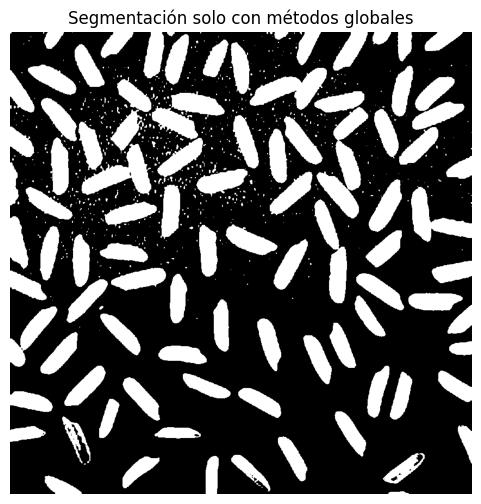

In [ ]:
equalized = cv2.equalizeHist(image)
_, binary = cv2.threshold(equalized, 180, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(6,6))
plt.imshow(binary, cmap='gray')
plt.title("Segmentación con umbralizaci[on y ecualización global")
plt.axis("off")
plt.show()